# Introduction:
This is my SIADS 591/592 milestone 1 comprehensive oral exam preparation report. It's a requirement for the Master of Applied Data Science program by the University of Michigan Ann Arbor School of Information.
## SIADS 591/592 Milestone 1 Comprehensive Oral Exam:
The purpose of this milestone course is to provide you with an opportunity to demonstrate your mastery of the material from the courses you've taken so far in the MADS program. One instrument that we will use to assess your knowledge is a comprehensive exam.  Comprehensive exams can take many forms: a timed written exam or a collection of papers that you write are commonly used formats.  In this course the comprehensive exam will take the form of a structured 20-minute live conversation (via Zoom) with the course instructor.  Alternative arrangements can be made if this proves impossible for technical reasons, but in all cases a "live" conversation is required.
## Scenario (dataset)
* Data Science for COVID-19 (DS4C).
* DS4C: Data Science for COVID-19 in South Korea.
* https://www.kaggle.com/kimjihoo/coronavirusdataset
* This dataset covers the initial impact of the coronavirus in South Korea. You may find the detailed description particularly helpful.

## Topics
Below are 5 topics for which you should prepare answers.

## Topic One:
Imagine a client who has asked you to do some analysis of the South Korean COVID-19 dataset. Who is the client and what have they asked you to do? Describe one maxim, question, or ethical commitment from the problem formulation phase of a data science project and apply it to this project. What would you do differently as a data scientist given your chosen maxim, question, or ethical commitment? Be prepared to illustrate your approach with examples drawn from the data.


## Topic Two:
Discuss the role of data visualization in data exploration and analysis. Be prepared to describe one basic and one advanced visual exploration technique that could be applied to the South Korean COVID-19 dataset. Explain how each visualization is encoded, how it is to be interpreted, and evaluate each in terms of its expressiveness and effectiveness if it was to be shared with a general audience. You should plan to experiment with different visualizations as part of your preparation for this question.

## Topic Three:
We are all familiar with the maxim “correlation does not imply causation”. But what does it mean when we assert that two or more variables are statistically related? Describe the concept as well explain how to calculate correlation coefficients. Utilize the South Korean COVID-19 dataset to illustrate your points. Do associations exist (either positive or negative) between variables derived from the data? Is there a causal story to be told about the transmission, incidence, or persistence of the coronavirus in South Korea?


## Topic Four:
The split-apply-combine data analysis pattern, identified by Hadley Wickham in a 2011 paper published in the Journal of Statistical Software, describes a strategy for analyzing data. Describe the pattern and how it has been implemented in the Pandas library. Discuss how the split-apply-combine pattern can be utilized to glean insights from the South Korean COVID-19 dataset.  Provide at least two examples of its use from your exploratory analysis of the data.

## Topic Five:
It's often said that data cleaning and manipulation takes up 80% of a data scientist's time, although that claim has recently been disputed.  No matter what the actual number is, describe the tools and/or techniques you utilize to make the data cleaning and manipulation effort more manageable, efficient, and scalable.  Use explicit examples from your analysis of the South Korean COVID-19 dataset.

# Explore DS4C datasets


In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import folium
from folium import plugins
import scipy.stats as stats

In [2]:
path = './datasets/'
weather = pd.read_csv(path + 'Weather.csv')
case = pd.read_csv(path + 'Case.csv')
region = pd.read_csv(path + 'Region.csv')
patient = pd.read_csv(path + 'PatientInfo.csv')
trend = pd.read_csv(path + 'SearchTrend.csv')

time = pd.read_csv(path + 'Time.csv')
time_prov = pd.read_csv(path + 'TimeProvince.csv')
time_gender = pd.read_csv(path + 'TimeGender.csv')
time_age = pd.read_csv(path + 'TimeAge.csv')

## Scenario One:
## A geospatial graph showing clusters of patients in different locations in South Korea
datasets:
- PatientInfo.csv
- Region.csv
- Cases.csv (for later usecase)

In [3]:
# only choose the patient in Korea
patient = patient[patient.country== 'Korea']

# marker cluster:  see the number of regional confirmed patient
regional_patient = pd.merge(patient[['patient_id','confirmed_date','province','city']],
                            region[['province','city','latitude','longitude']], 
                            how = 'left', on = ['province','city'])
# regional_patient.head()

In [4]:
def patient_cluster_geo_graph():
    # Define the location to start the map at 
    location = (37.532600, 127.024612)
    # initializing the map
    # m = folium.Map(location = location, zoom_start=7, hight = 500, width = 600) # location in Korean 

    # also can try these options
    # m = folium.Map([37, 128], zoom_start=7, tiles='Stamen Terrain') 
    m = folium.Map([37, 128], zoom_start=7,hight = 500, width = 600, tiles='Stamen Toner') 

    plugins.MousePosition().add_to(m) ## you can easily get coordinates.
    regional_count = regional_patient[['latitude','longitude']].dropna() # drop missing values
    plugins.MarkerCluster(regional_count).add_to(m)
    
    return m

patient_cluster_geo_graph()

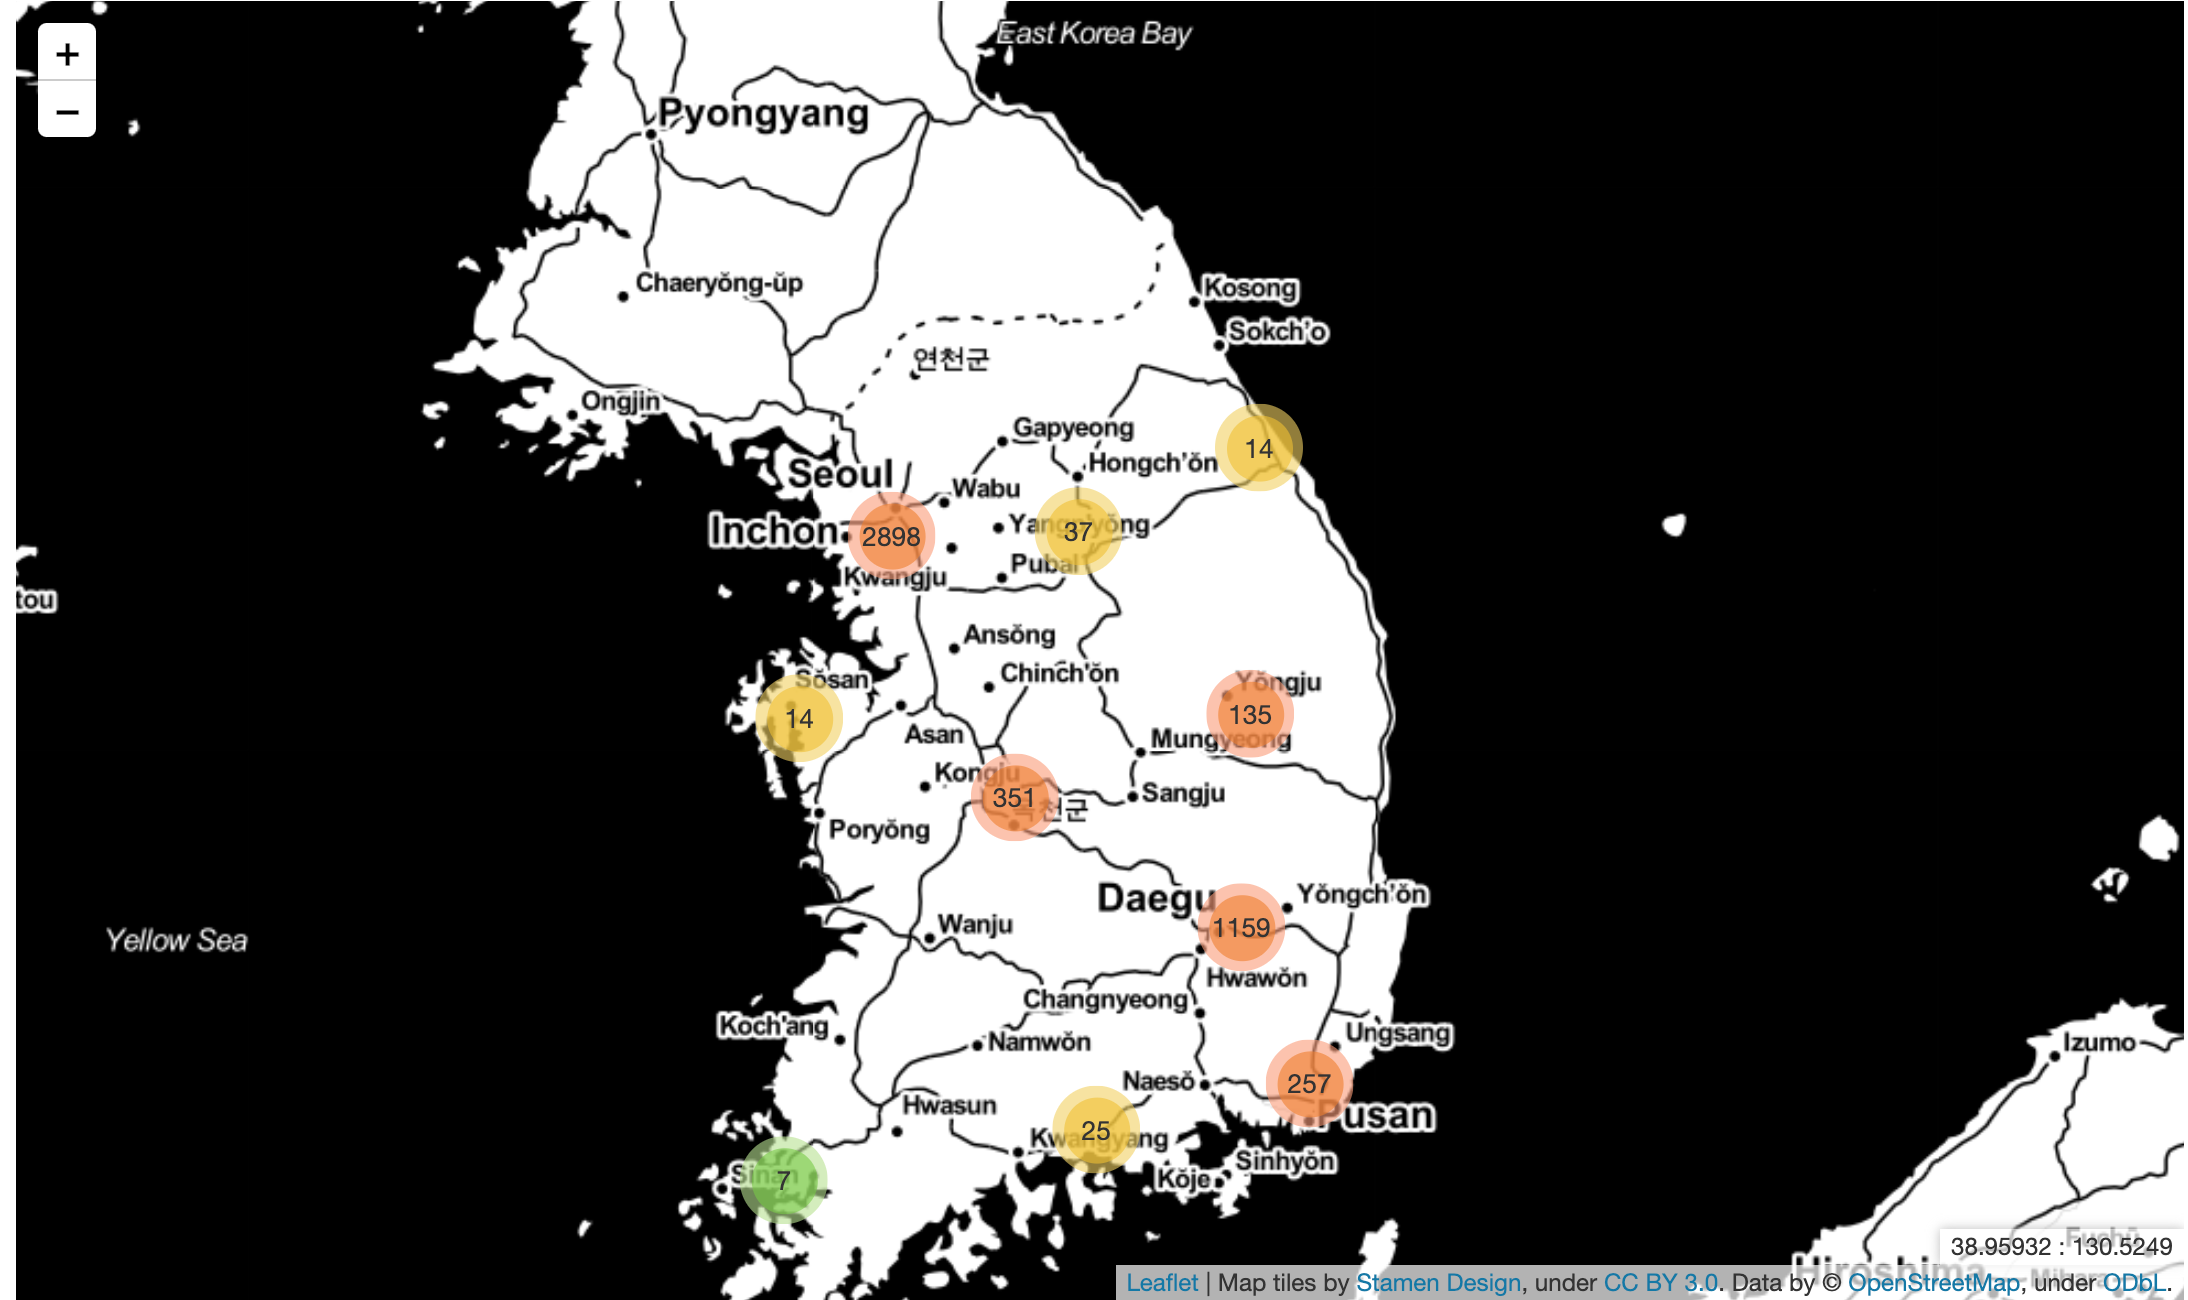

## Scenario Two:
### Which province has the most severe infection (confirmed cases)?
* time line: Jan 20, 2020 to Jun 30, 2020
* datasets:
    - Cases.csv
* Note: The data about the infection (confirmed cases) is not accurate since Kaggle stopped updating the South Korea Covid-19 dataset. To see the latest updates, please click [here](http://ncov.mohw.go.kr/en/bdBoardList.do?brdId=16&brdGubun=162) (Ministry of Health and Welfare, South Korea).

In [5]:
# get the total confirmed cases for each province
case_total = case.groupby('province').sum().reset_index()
# case_total.head()

In [6]:
def most_severe_infection_province_bar_chart():
    highest_confirm_per = round(case_total.confirmed.max()/case_total.confirmed.sum(),2)
    # print(highest_confirm_per)

    # plot infection bar chart
    bar = alt.Chart(case_total).mark_bar(size = 25).encode(
        y = alt.Y('province:N', sort = '-x', title = None),
        x = alt.X('confirmed:Q',axis = None),
        color = alt.condition(alt.datum.province == 'Daegu',
                              alt.value('red'), alt.value('gray')))
    
    text = bar.mark_text(dx = 15).encode(
        text = alt.Text('confirmed:Q'))

    chart_1 = (bar + text).properties(
        width = 500,
        height = 500,
        title={"text": ['Daegu is the province with most severe infection'], 
                "subtitle": ["which accounts 59% of the total confirmed cases in total"],
                'anchor': 'start',
                'dy': -10}
    ).configure(
            background='#f0f0f0'
    ).configure_title(
            fontSize=24,
            subtitleFontSize= 18,
            anchor='start',
            #subtitlePadding = 2,
            dy=-10
    ).configure_view(stroke=None)

    return chart_1

most_severe_infection_province_bar_chart()

alt.LayerChart(...)

## Scenario Three:
### Which age group is more vulnerable to covid-19? 
Explore the patterns of confirmed rate and deceased rate for each age group to see which group is likely to suffer from the Covid-19 and hard to recover.
* dataset: TimeAge.csv

In [7]:
# loc the needed column and group the data by age
age_grouped = time_age.iloc[:, [2,3,4]].groupby('age').max().reset_index()

# get ratio columns
age_grouped['confirmed'] = age_grouped['confirmed'] / age_grouped['confirmed'].sum()
age_grouped['deceased'] = age_grouped['deceased'] / age_grouped['deceased'].sum()

# melt the data to prepare the altair vis
age_melted = age_grouped.melt(id_vars = 'age',value_vars = age_grouped.columns[1:])
# age_melted.head()

In [8]:
def age_group_stack_bar_chart():
    range_ = ['#1A85FF', '#D41159']
    bar_chart = alt.Chart(age_melted).mark_bar().encode(
            y = alt.Y('age:O', title='age groups',
            sort=alt.EncodingSortField(field='age', order='descending')
                     ),
        x = alt.X('value:Q', title='percentage'),
        color=alt.Color('variable:N',
                       legend = alt.Legend(orient='top',
                                          title='',
                                          labelFontSize=18),
                        scale=alt.Scale(range=range_)
                       )
        ).properties(
        title = {
            'text' :["Covid-19 confirmed rate VS deceased rate ", 'in different age groups'],
            # subtitle= ['fist line','second line'] to cut the long line to two lines
            'subtitle':['Is Covid -19 more likely to have a fatal impact on the elderly?']
        },
        height=350,
        width=500
    ).configure(
        background='#f0f0f0'
    ).configure_title(
        fontSize=24,
        subtitleFontSize= 18,
        anchor='start',
        #subtitlePadding = 2,
        dy=-10
    )

    return bar_chart

age_group_stack_bar_chart()

alt.Chart(...)

use matplotlib to make pie charts as alternative visualization (prepare for topic 3 vis)

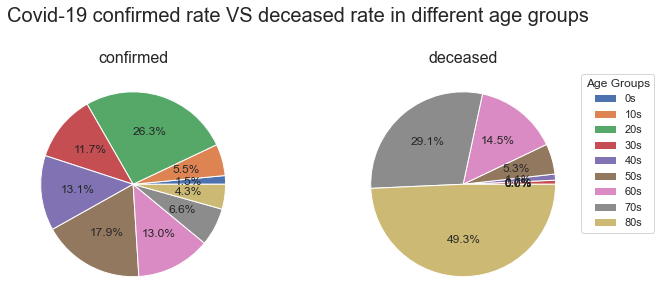

In [9]:
def comparison_age_group_pie_chart():
    # make two pie charts
    sns.set_theme(style="white")

    labels = age_grouped.age
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
    fig.suptitle('Covid-19 confirmed rate VS deceased rate in different age groups',fontsize = 20)
    pie1 = ax1.pie(x = age_grouped.confirmed, autopct = '%.1f%%');
    ax1.set_title('confirmed', fontsize = 16)
    pie2 = ax2.pie(x = age_grouped.deceased, autopct = '%.1f%%');
    ax2.set_title('deceased', fontsize = 16)
    fig.legend([pie1, pie2], labels = labels, title = 'Age Groups', loc = 'center right');
    plt.tight_layout(5) 
    
comparison_age_group_pie_chart()

## Scenario Four:
### Which group has a higher fatality rate after being confirmed with covid-19 , female or male? 
Explore the patterns of the fatality rate for female and male groups to see which group is harder to survive after being confirmed with Covid-19.
* dataset: TimeGender.csv

In [10]:
time_gender_grouped = time_gender.iloc[:, [2,3,4]].groupby('sex').max().reset_index()
# calculate the fatality rate 
time_gender_grouped['fatality_ratio'] = round(time_gender_grouped['deceased'] / time_gender_grouped['confirmed'],3)

In [11]:
def gender_group_bar_chart():
    range_ = ['#D41159', '#1A85FF']
    bar_chart = alt.Chart(time_gender_grouped).mark_bar(size=70).encode(
            y = alt.Y('sex:N', title='gender',
            sort=alt.EncodingSortField(field='fatality_ratio', order='descending')),
        x = alt.X('fatality_ratio:Q'),
        color=alt.Color('sex:N',legend = alt.Legend(orient='top',title='',labelFontSize=18),
                        scale=alt.Scale(range=range_))
        ).properties(
        title = {
            'text' :['Covid-19 fatality rate in different gender groups'],
            'subtitle':['Do female have a higher fatality rate after being diagnosed with covid-19?']
                },
        height=200,
        width=500
    ).configure(
        background='#f0f0f0'
    ).configure_title(
        fontSize=24,
        subtitleFontSize= 18,
        anchor='start',
        dy=-10
    )
    
    return bar_chart
 
gender_group_bar_chart()

alt.Chart(...)

## Scenario Five:
### What are the daily new confirmed, deceased, and released cases during the epidemic? 
Explore the trending patterns of the daily changes of the confirmed, deceased, and released cases during the epidemic.
* dataset: Time.csv

In [12]:
# make a func to get new case column
def add_newcase_column(df,column_lst):
    new_df = df.copy()
    columns_str = ['new_' + column for column in column_lst]
    
    for column in column_lst:
        new_column = [0]
        for i in range(len(new_df[column]) -1):
            new_column.append(new_df[column].iloc[i+1] - new_df[column].iloc[i])
        column_str = 'new_' + column
        new_df[column_str] = new_column

    return new_df

# add daily confirmed, released and deceased cases  
column_lst = list(time.columns[-3:])
daily_new_cases = add_newcase_column(time, column_lst)
# only keep the date and three new cases columns
daily_new_cases = daily_new_cases.iloc[:, [0, -3,-2,-1]]

In [13]:
def daily_new_cases_line_chart():
    line_chart = alt.Chart(daily_new_cases).transform_fold(
        ['new_confirmed', 'new_released', 'new_deceased'],
        as_ = ['new_cases_type', 'new_cases_value']
    ).mark_line(size=3).encode(
        y = alt.Y('new_cases_value:Q'),
        x = alt.X('date:T'),
        color=alt.Color('new_cases_type:N',legend = alt.Legend(orient='top',title='',labelFontSize=14))
    ).properties(
        title = {
            'text' :['Trends of daily changes '],
            'subtitle':['of confirmed, deceased, and released cases during the epidemic']
                },
        height=300,
        width=700
    ).configure(
        background='#f0f0f0'
    ).configure_title(
        fontSize=24,
        subtitleFontSize= 18,
        anchor='start',
        dy=-10
    )
    return line_chart

daily_new_cases_line_chart()

alt.Chart(...)

## Scenario Six:
### What's the trend of searching keywords in NAVER protals in South Korea? 
Explore the trends of searching keywords in NAVER which is one of the largest prtals in South Korea during the pandemic.
* dataset: SearchTrend.csv

In [14]:
searching_trend = trend.copy()
# change string date type to datatime
searching_trend['date'] = pd.to_datetime(searching_trend['date'])
searching_trend = searching_trend[searching_trend.date >= '2019-12-01'].set_index('date')
# searching_trend.head()

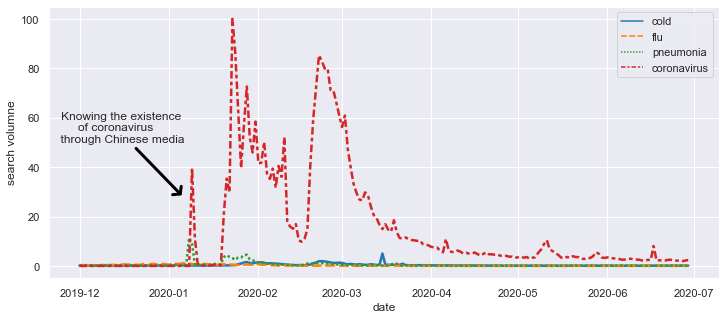

In [15]:
def search_trend_line_chart():
    # plot time series line chart
    sns.set_theme(style="darkgrid")
    fig, ax = plt.subplots(figsize = (12,5))

    # palette = ['colorblind', 'deep', 'muted','pastel', 'dark']
    sns.lineplot(data=searching_trend, palette="tab10", linewidth=2.5)
    # sns.barplot(data=trend.coronavirus.rolling(7).mean(),color = 'g', linewidth=2.5)
    # plt.fill_between(trend.index, trend.coronavirus, alpha = 0.4, color = 'r')
    plt.ylabel('search volumne')

    plt.annotate('   Knowing the existence\nof coronavirus\n    through Chinese media', 
                 xy=(0.2,0.3 ), xycoords='axes fraction', xytext=(0.1, 0.5),  textcoords='axes fraction',
                 fontsize=12, horizontalalignment='center',
                 arrowprops=dict(arrowstyle='->, head_width=0.5', color='black', linewidth=3))

    return plt.show()

search_trend_line_chart()

## Scenario Seven:
### Will different weather conditions affect the spread of covid-19? 
Explore the correlation between different weather conditions and the spread of covid 19. In particular, look for potential correlations between temperature, wind speed, humidity, and precipitation and the confirmed cases in South Korean.
* dataset: Weather.csv
* dataset: Time.csv

In [16]:
# only keep weather data after 2020-01-01 
# and columns of avg_temp, precipitation,max_wind_speed, and avg_relative_humidity
weather_2020 = weather.loc[weather.date >= '2020-01-01', ['date','avg_temp', 'max_wind_speed', 'avg_relative_humidity', 'precipitation']]\
                .reset_index(drop = True)
# change string date type to datatime
weather_2020['date'] = pd.to_datetime(weather_2020['date'])
# groupy the weather data by date to get daily avg data
weather_2020 = weather_2020.groupby('date').mean().reset_index()

# get daily new confirmed cases
confirmed_df = time.loc[:, ['date','confirmed']]
# change string date type to datatime
confirmed_df['date'] = pd.to_datetime(confirmed_df['date'])
# make a daily new confiremd cases column
confirmed_df['new_confirmed'] = confirmed_df['confirmed'].diff().fillna(confirmed_df['confirmed'][0])
# only keep the new confirmed cases data
confirmed_df.drop('confirmed',1, inplace=True)

# merge two df together
merged_weather = pd.merge(confirmed_df,weather_2020, on = ['date'])
#rename columns
merged_weather.rename(columns = {'max_wind_speed':'avg_wind_speed', 
                                 'avg_relative_humidity': 'avg_humidity',
                                'precipitation': 'avg_precipitation'}, inplace=True)

# cut avg_temp into different catogory
merged_weather['seg_temp'] = pd.cut(merged_weather['avg_temp'], bins = [-3,7,30])

In [17]:
# check the max and min tem
# print(merged_weather['avg_temp'].max(), merged_weather['avg_temp'].min())
# print(merged_weather['avg_wind_speed'].max(), merged_weather['avg_wind_speed'].min())
# print(merged_weather['avg_humidity'].max(), merged_weather['avg_humidity'].min())

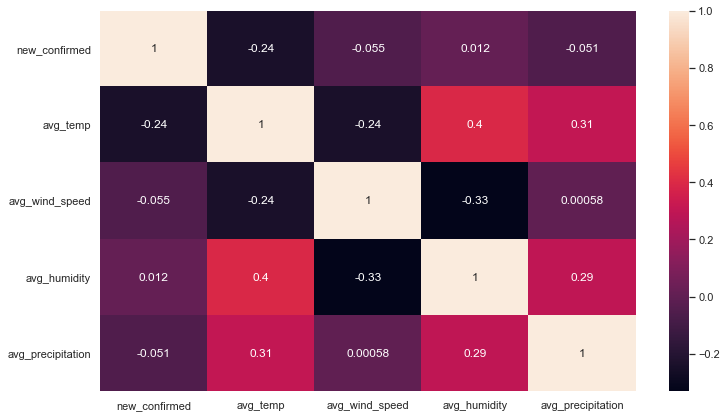

In [18]:
# plot a heatmap to see the correlations 
fig, ax = plt.subplots(figsize = (12,7))
corr = merged_weather.corr() # it calculat the pairwise correlation between columns and return a corelatio matrix
sns.heatmap(corr, annot =True)

avg_temp and new confirmed cases


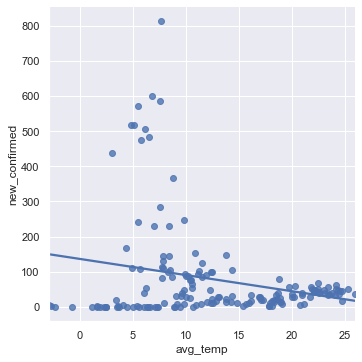

In [19]:
# vis to see the regression line
def weather_condition_and_new_confirmed_cases_regression_plot(column):
    print(column + ' and new confirmed cases')
    sns.lmplot(x= column, y = 'new_confirmed', data = merged_weather,ci = None,);

col = 'avg_temp'
# col = 'avg_wind_speed'
# col = 'avg_humidity'
weather_condition_and_new_confirmed_cases_regression_plot(col)

Calculate the correlation coefficients along with the p-values for each pairs

In [20]:
# use the pearsonr to calculate both coefficients and p values
for i in merged_weather.columns[2:-1]:
    r, p = stats.pearsonr(merged_weather.new_confirmed, merged_weather[i])
    print('{} and new confirmed cases: correlation coefficient: {:3f}, p-value: {:3f}'.format(i, r,p))

avg_temp and new confirmed cases: correlation coefficient: -0.237924, p-value: 0.002298
avg_wind_speed and new confirmed cases: correlation coefficient: -0.055235, p-value: 0.485105
avg_humidity and new confirmed cases: correlation coefficient: 0.012499, p-value: 0.874562
avg_precipitation and new confirmed cases: correlation coefficient: -0.051201, p-value: 0.517589


Findings:

- From the heatmap above we can see that, overall, the correlation between temperature and new confirmed cases is relatively negative (-0.24). 
- For the correlations between new confirmed cases with wind speed, humidity, and precipitation are close to 0, which means no correlation there. 
- Therefore, we can see that temperature do play a role in the transformation of coronavirus in South Korea.
- but is the correlation statistically related? Only the correlation between temperature and new confirmed cases is statistically related (p-value<0.05).
- Next, i will dive deeper to explore the correlation between temperature and new confirmed cases

Further analysis about the temperature and confirmed cases.
I cut the temperature into bins range of -3,7,30 and plot the data to further explore

avg_temp and new confirmed cases


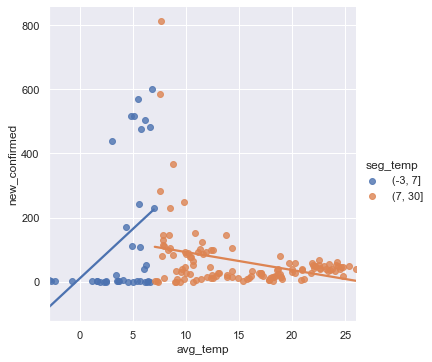

In [21]:
print('avg_temp and new confirmed cases')
sns.lmplot(x= 'avg_temp', y = 'new_confirmed', data = merged_weather, hue = 'seg_temp',ci = None); 

findings:
- When the air temperature is below 7 degrees, there is a positive correlation between temperature and new confirmed cases, with a correlation coefficient of 0.4. 
- When the temperature is above 7 degrees, there is a negative correlation between them, with a correlation coefficient of 0.3.
- So in this range, as the temperature goes up, new confirmed cases tend to go down, and the relationship between them is a little bit weak.
- So, when the temperature is lower (eg. in winter), covid-19 is easier to spread, and when the temperature is higher than 7 degree (eg. in summer), it is not easy to spread.
- 7 degree Celsius might be the good temperature for the covid-19 virus to survive.
- One potential issue is weather is seasonal data, and the data in the dataset only have the data from January to July in 2020. Kaggle stopped updating all the dataset, so more cautious conclusion is needed.

### Some experiments on the efficiency of data manipulation
Experiments for preparing the topics of the oral exam

In [22]:
# convert celsius to fahrenheit if you need
# f = (c*1.8) +32
# c = (f-32)*(5/9)
# weather_2020.groupby(['province']).agg(lambda x: (np.mean(x)*1.8) + 32).sort_values('avg_temp').head(3)

# curious about the efficiency of .agg and .apply.
# %timeit weather_2020.groupby(['province']).agg(lambda x: (np.mean(x)*1.8) + 32)
# %timeit weather_2020.groupby(['province']).apply(lambda x: (np.mean(x)*1.8) + 32)

In [23]:
# groupby province and use resample method to get monthly frequency data 
# and apply mean method to get the monthly average temperature for each province in South Korea

# transformation, resample operations
# need to set date as index first, resample only valid on datetime index
# weather_2020.set_index('date').groupby('province').resample('3M').mean()

In [24]:
# %timeit weather[weather.date >= '2020-01-01']
# %timeit weather.loc[weather.date >= '2020-01-01'] # its the same as the above one
# %timeit weather.where(weather.date >= '2020-01-01').dropna() # 18 times slower than the loc and need to manually dropnan